# Polynomial Regression

Polynomial Regression is an extension of Linear Regression that models the relationship between the independent variable `x` and the dependent variable `y` as an nth-degree polynomial. It's particularly effective when the data shows a non-linear trend.

---

## 1. Simple Linear Regression

**Formula:**
$$
y = \beta_0 + \beta_1 x + \varepsilon
$$

- `y`: Target variable  
- `x`: Input feature  
- `\beta_0`: Intercept  
- `\beta_1`: Coefficient (slope)  
- `\varepsilon`: Error term

---

## 2. Multiple Linear Regression

**Formula:**
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \varepsilon
$$

- Suitable when there are multiple independent variables.

---

## 3. Polynomial Regression

**Formula (degree n):**
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \dots + \beta_n x^n + \varepsilon
$$

- Allows capturing complex, non-linear relationships between `x` and `y`.
- Can be seen as a linear model in terms of parameters, though the predictors are polynomial terms.

---

## . Assumptions of Linear Regression

For reliable model performance, the following assumptions should be satisfied:

1. **Linearity** — The relationship between predictors and outcome is linear.
2. **Normality of Residuals** — Residuals are normally distributed.
3. **Homoscedasticity** — Constant variance of residuals across all levels of independent variables.
4. **No Autocorrelation** — Residuals are independent (especially in time series).
5. **No or Little Multicollinearity** — Predictors are not highly correlated with each other.

---

> **Note**: Polynomial regression may overfit if the degree is too high. Use cross-validation and visualization to find the optimal degree.

# Assumptions of Linear Regression

Understanding and validating the assumptions of linear regression is essential to ensure the reliability, interpretability, and accuracy of your model.

---

## 1. Linearity

### **Assumption:**
There is a linear relationship between the independent variable(s) and the dependent variable. The model assumes that changes in independent variables lead to proportional changes in the dependent variable.

### **When violated:**
- Bias in parameter estimates
- Reduced predictive accuracy
- Invalid hypothesis tests and confidence intervals

### **How to check:**
1. Scatter plot of each feature vs. target
2. Residual plot (should show no pattern)
3. Try adding polynomial terms

### **What to do if violated:**
1. Apply transformations (e.g., log, square root)
2. Use Polynomial Regression
3. Try Piecewise Regression
4. Consider non-parametric or semi-parametric methods

---

## 2. Normality of Residuals

### **Assumption:**
The residuals (errors) are normally distributed with a mean of zero and constant variance.

### **When violated:**
- Inaccurate hypothesis tests (t-tests, F-tests)
- Invalid confidence intervals
- Potential degradation in model performance

### **How to check:**
1. Histogram of residuals
2. Q-Q (Quantile-Quantile) plot
3. Statistical tests (Shapiro-Wilk, Jarque-Bera, Omnibus)

### **What to do if violated:**
1. Use model selection techniques (e.g., choose simpler models)
2. Robust regression
3. Non-parametric or semi-parametric models
4. Bootstrapping methods

---

## 3. Homoscedasticity

### **Assumption:**
The residuals should have constant variance across all levels of the independent variables.

> **Homoscedasticity**: Equal spread of residuals  
> **Heteroscedasticity**: Unequal spread (violates assumption)

### **When violated:**
- Inefficient estimates
- Inaccurate hypothesis tests
- Invalid confidence intervals

### **How to check:**
1. Residual vs. Fitted plot
2. Breusch-Pagan test

### **What to do if violated:**
1. Transform variables (e.g., log of target)
2. Weighted least squares regression
3. Robust regression

---


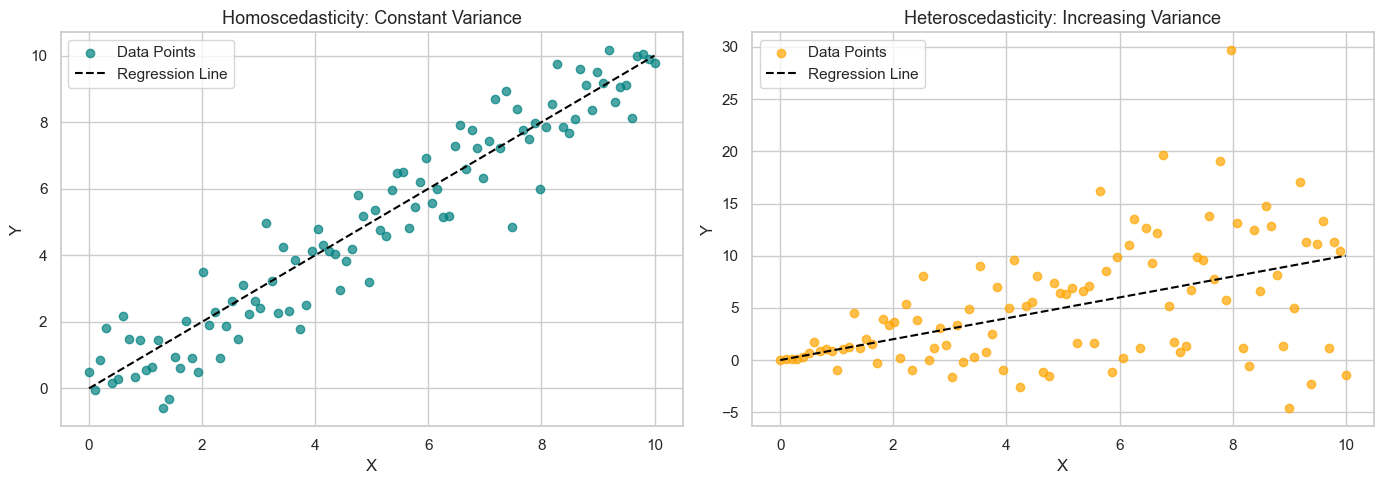

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set(style="whitegrid")

# Data
np.random.seed(42)
x = np.linspace(0, 10, 100)

# True regression line: y = x (45-degree line)
true_slope = 1

# Homoscedasticity (constant variance)
noise_homo = np.random.normal(0, 1, size=100)
y_homo = true_slope * x + noise_homo

# Heteroscedasticity (variance increases with x)
noise_hetero = np.random.normal(0, 1, size=100) * x
y_hetero = true_slope * x + noise_hetero

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Homoscedasticity
axes[0].scatter(x, y_homo, color='teal', alpha=0.7, label='Data Points')
axes[0].plot(x, true_slope * x, color='black', linestyle='--', label='Regression Line')
axes[0].set_title("Homoscedasticity: Constant Variance", fontsize=13)
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")
axes[0].legend()

# Plot Heteroscedasticity
axes[1].scatter(x, y_hetero, color='orange', alpha=0.7, label='Data Points')
axes[1].plot(x, true_slope * x, color='black', linestyle='--', label='Regression Line')
axes[1].set_title("Heteroscedasticity: Increasing Variance", fontsize=13)
axes[1].set_xlabel("X")
axes[1].set_ylabel("Y")
axes[1].legend()

plt.tight_layout()
plt.show()


## 4. Multicollinearity

### **Assumption:**
Independent variables should not be highly correlated with each other.

### **When violated:**
- Coefficients become unstable and unreliable
- Difficult to interpret the effect of individual variables

> Example: If two features increase together, increasing one can falsely appear to increase the other’s effect.

### **How to check:**
1. Pearson correlation matrix (look for |r| > 0.8 or 0.9)
2. Variance Inflation Factor (VIF > 5 or 10 indicates concern)

### **Is multicollinearity always bad?**
- **For prediction-focused models:** Not always harmful
- **For interpretable models:** Problematic, as it clouds the understanding of feature importance

### **What to do if violated:**
1. Remove or combine correlated variables
2. Use Principal Component Analysis (PCA)
3. Regularization (Ridge, Lasso)

---

> **Tip**: Always visualize and test assumptions before finalizing your regression model. Addressing assumption violations leads to more trustworthy results and deeper insights.


# Multicollinearity in Regression

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, meaning they contain similar information about the variance in the dependent variable.

---

## What Happens When Multicollinearity is Present?

1. Difficult to identify the most important predictors
2. Increased standard errors of coefficients
3. Coefficients become unstable and unreliable
4. Inflated variances lead to poor interpretability

---

## Types of Multicollinearity

1. **Perfect Multicollinearity**: When one predictor is an exact linear function of others  
2. **Structural Multicollinearity**: Arises from model design (e.g., using both `x` and `x²`)

---

## How to Detect Multicollinearity

### 1. **Correlation Matrix**
- Examine Pearson correlation coefficients between features.
- If correlation > 0.8 or 0.9, it suggests possible multicollinearity.

### 2. **Variance Inflation Factor (VIF)**

$$
VIF = \frac{1}{1 - R^2}
$$

Where `R²` is the coefficient of determination when a feature is regressed on all other features.

**Steps to calculate VIF:**
- For each input feature, treat it as the target.
- Regress it against all other input features.
- Compute the R² value.
- Use the formula above to calculate VIF.

**Interpretation:**
- VIF < 5: No multicollinearity concern  
- VIF between 5–10: Moderate multicollinearity  
- VIF > 10: High multicollinearity (consider action)

### 3. **Condition Number**
$$
\text{Condition Number} = \frac{\text{Largest Eigenvalue}}{\text{Smallest Eigenvalue}}
$$

- Condition number > 30 indicates strong multicollinearity
- Reflects numerical instability or an ill-conditioned matrix

---

## How to Handle Multicollinearity

1. Collect more data (helps break the relationship between variables)
2. Remove one of the highly correlated variables
3. Combine correlated variables (e.g., through feature engineering)
4. Use **Principal Component Analysis (PCA)** or **Partial Least Squares (PLS)**
5. Apply **Regularization** (Ridge or Lasso)

---

## Mutual Inflation Factor (MIF)

**Definition:**  
MIF quantifies the degree of *pairwise* multicollinearity between two variables, focusing on the direct relationship between them rather than the collective effect.

### How is MIF Different from VIF?

- **VIF**: Measures the inflation of variance for one variable due to *all others*.
- **MIF**: Focuses on the inflation due to *a specific other variable*.

### Why is MIF Important?

- Helps when you suspect strong dependency between specific variable pairs.
- Useful for granular analysis of variable interactions.

### MIF (Conceptual Formula):
$$
MIF \approx \frac{1}{1 - R^2}
$$

Where \( R^2 \) is the square of the Pearson correlation coefficient between two variables.

### Interpretation:
- **MIF = 1**: No pairwise multicollinearity (independence)
- **MIF > 1**: Some level of linear dependence
- **Higher MIF**: Stronger linear relationship between the pair

---

## Limitations of MIF

1. Only detects **pairwise** multicollinearity  
2. Does not capture **combined multicollinearity** (where multiple features together cause issues)
3. Overlaps conceptually with VIF but doesn’t replace it

---

> **Summary**:  
Multicollinearity doesn’t always harm model prediction, but it severely affects interpretability. Use both VIF and MIF to diagnose and handle it effectively based on the modeling goal.


# Limitations of Linear Regression Algorithm

While Linear Regression is a foundational algorithm in machine learning and statistics, it has several limitations that can impact its effectiveness in real-world scenarios.

---

## 1. Not Suitable for Nonlinear Relationships

Linear Regression assumes a linear relationship between the features and the target variable. It cannot effectively model complex, nonlinear patterns unless the features are transformed appropriately (e.g., polynomial terms, log transformations).

---

## 2. Sensitive to Outliers

Linear Regression minimizes the sum of squared errors, which makes it highly sensitive to outliers. Even a single extreme value can disproportionately influence the model and lead to inaccurate predictions.

---

## 3. Assumes Independence of Features and Errors

- If features are highly correlated (**multicollinearity**), it affects the stability and interpretability of the coefficients.
- If residuals are autocorrelated (common in time series), the model’s reliability is compromised.

---

## 4. Overfitting in High-Dimensional Data

When the number of features is large relative to the number of observations, the model can overfit the training data, capturing noise rather than true underlying patterns.

---

## 5. Limited Handling of Categorical Variables

Linear Regression does not natively handle categorical features. They must be encoded using techniques like one-hot encoding, which increases the complexity of preprocessing and the dimensionality of the data.

---

## 6. Inefficient with Missing Data

Linear Regression cannot handle missing values natively. Data must be either imputed or removed, both of which can introduce bias or lead to data loss.

---

## 7. Assumes Constant Variance of Errors (Homoscedasticity)

If the variance of errors is not constant (**heteroscedasticity**), the model’s predictions may become less reliable, especially for extreme values of the independent variables.

---

## 8. Struggles with Non-Gaussian Noise

The algorithm assumes that residuals are normally distributed. Violating this assumption can result in invalid confidence intervals and hypothesis tests.

---

## 9. Limited Use in Classification Tasks

Linear Regression outputs continuous values and is unsuitable for classification problems without modification. For binary classification, **Logistic Regression** or other classification models are preferred.

---

## 10. Interpretability Challenges in Multivariate Models

As the number of features increases, interpreting individual coefficients becomes difficult, especially in the presence of multicollinearity, making it hard to explain the impact of each feature on the target.

---

> **Conclusion:**  
Linear Regression is simple and interpretable, but careful consideration of its assumptions and limitations is essential for building robust, meaningful models. In many practical cases, alternative models like decision trees, regularized regressions, or non-parametric methods may provide better results.


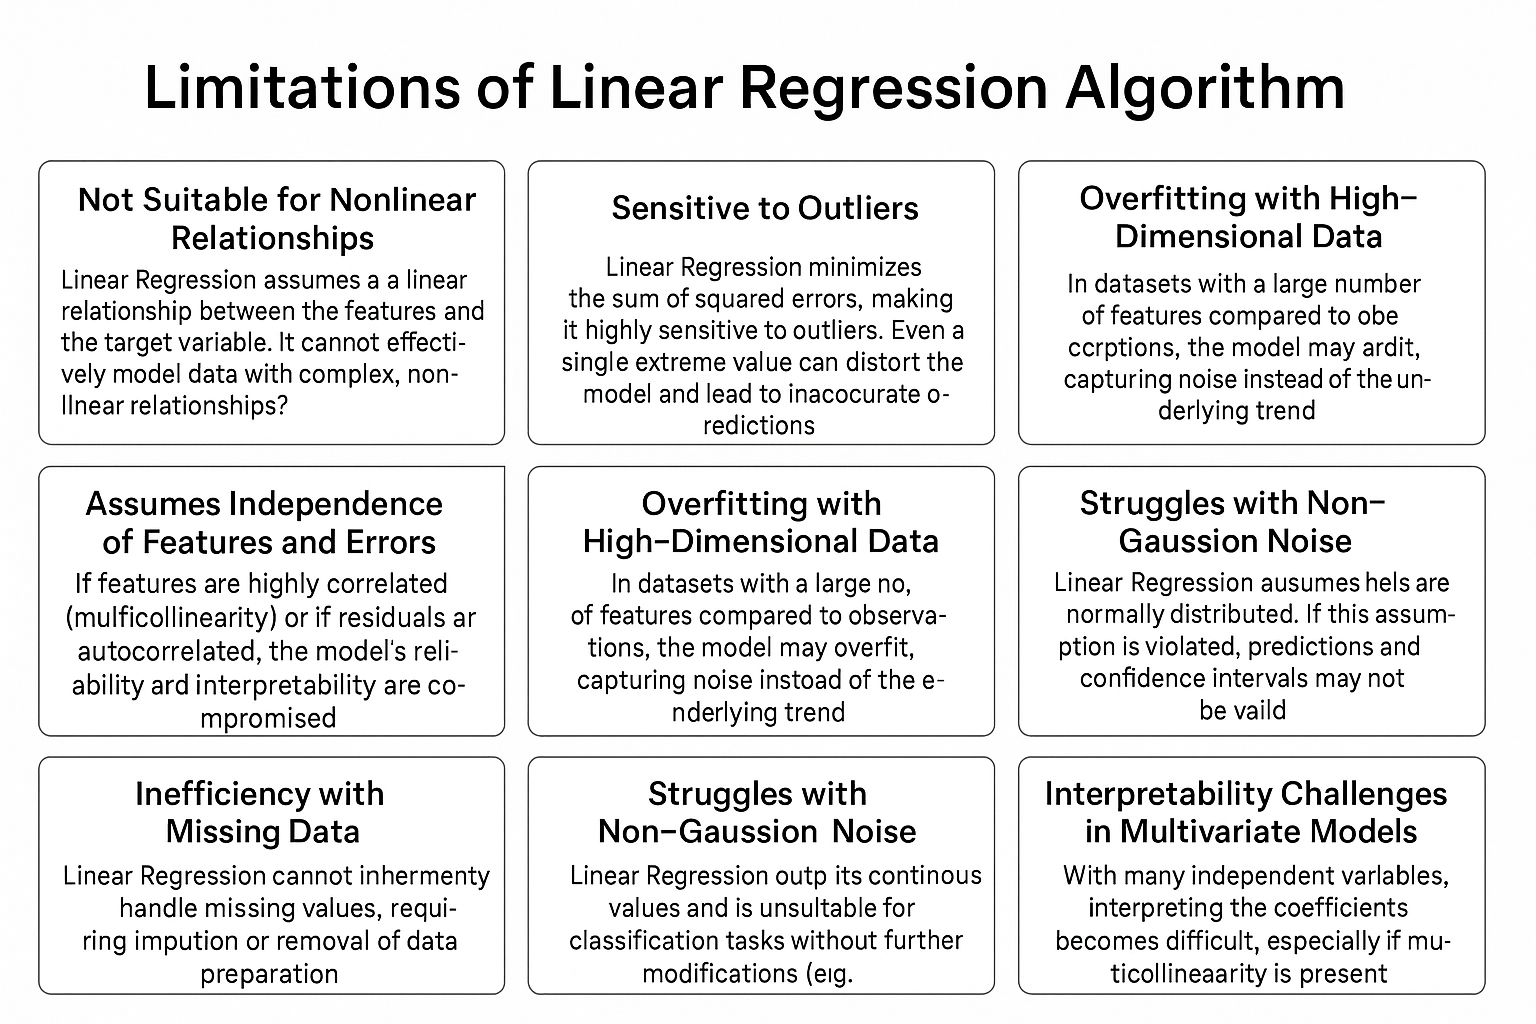